In [338]:
import pandas as pd

import seaborn as sns

sns.set_context("talk")
import matplotlib.pyplot as plt
import statsmodels

import statsmodels.formula.api as smf
import numpy as np
plt.style.use("ggplot")

In [339]:
data=pd.read_csv('clean_data/final_dataset.csv')

In [340]:
data[['income_census','pop_census']]=np.log(data[['income_census','pop_census']])

# OLS

## Mormon-> bad outcomes

In [341]:
#https://www.deseretnews.com/article/900008667/utah-is-taking-a-closer-look-at-how-and-what-people-drink-when-it-comes-to-alcohol.html

In [342]:
smf.ols('mortality~mormon',data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mortality   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     55.19
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           1.41e-13
Time:                        16:54:22   Log-Likelihood:                 3422.0
No. Observations:                3126   AIC:                            -6840.
Df Residuals:                    3124   BIC:                            -6828.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1466      0.001     98.088      0.000       0.144       0.150
mormon         0.0001   1.69e-05      7.429      0.000    9.25e-05       0.000
==============================================================================
Omnibus:                     2335.868   Durbin-Watson:                   1.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73216.920
Skew:                           3.221   Prob(JB):                         0.00
Kurtosis:                      25.817   Cond. No.                         91.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [343]:
#Just income
smf.ols('mortality~(income_census)+pov_saipe_2010',data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mortality   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     454.6
Date:                Sun, 23 Dec 2018   Prob (F-statistic):          5.22e-174
Time:                        16:54:22   Log-Likelihood:                 3794.0
No. Observations:                3126   AIC:                            -7582.
Df Residuals:                    3123   BIC:                            -7564.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.3431      0.096     -3.569      0.000      -0.532      -0.155
income_census      0.0372      0.009      4.048      0.000       0.019       0.055
pov_saipe_2010     0.7213      0.033     21.990      0.000       0.657       0.786
==============================================================================
Omnibus:                     2340.856   Durbin-Watson:                   1.285
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81320.453
Skew:                           3.191   Prob(JB):                         0.00
Kurtosis:                      27.158   Cond. No.                         783.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [344]:
## Controls for income and race
smf.ols('mortality~income_census+nhwrate+blkrate+(pop_census)*mormon+nativerate+asianrate+state_mormon+pov_saipe_2010+hisprate',data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mortality   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     292.8
Date:                Sun, 23 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:54:22   Log-Likelihood:                 4504.6
No. Observations:                3126   AIC:                            -8985.
Df Residuals:                    3114   BIC:                            -8913.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0846      0.106      0.795      0.426      -0.124       0.293
income_census         0.0398      0.009      4.608      0.000       0.023       0.057
nhwrate              -0.5174      0.062     -8.299      0.000      -0.640      -0.395
blkrate              -0.5312      0.062     -8.554      0.000      -0.653      -0.409
pop_census            0.0063      0.001      7.216      0.000       0.005       0.008
mormon                0.0003   8.14e-05      3.359      0.001       0.000       0.000
pop_census:mormon -2.514e-05   8.17e-06     -3.078      0.002   -4.12e-05   -9.13e-06
nativerate            0.0072      0.069      0.105      0.917      -0.127       0.142
asianrate            -0.9139      0.091    -10.043      0.000      -1.092      -0.735
state_mormon          0.1349      0.030      4.450      0.000       0.075       0.194
pov_saipe_2010        0.6429      0.032     20.058      0.000       0.580       0.706
hisprate             -0.5585      0.062     -8.974      0.000      -0.681      -0.437
==============================================================================
Omnibus:                     1386.698   Durbin-Watson:                   1.476
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26730.781
Skew:                           1.627   Prob(JB):                         0.00
Kurtosis:                      16.951   Cond. No.                     1.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [345]:
## Fixed effects
smf.ols('mortality~state',data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mortality   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     36.61
Date:                Sun, 23 Dec 2018   Prob (F-statistic):          4.80e-270
Time:                        16:54:22   Log-Likelihood:                 4124.5
No. Observations:                3126   AIC:                            -8147.
Df Residuals:                    3075   BIC:                            -7839.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.1775      0.008     22.276      0.000       0.162       0.193
state[T.Alaska]                   0.2618      0.016     16.610      0.000       0.231       0.293
state[T.Arizona]                  0.0987      0.019      5.299      0.000       0.062       0.135
state[T.Arkansas]                -0.0050      0.011     -0.453      0.650      -0.026       0.017
state[T.California]              -0.0110      0.012     -0.944      0.345      -0.034       0.012
state[T.Colorado]                 0.0019      0.011      0.166      0.868      -0.020       0.024
state[T.Connecticut]             -0.0873      0.024     -3.580      0.000      -0.135      -0.039
state[T.Delaware]                -0.0218      0.038     -0.567      0.571      -0.097       0.054
state[T.District of Columbia]     0.1132      0.066      1.723      0.085      -0.016       0.242
state[T.Florida]                  0.0058      0.011      0.517      0.605      -0.016       0.028
state[T.Georgia]                 -0.0147      0.009     -1.546      0.122      -0.033       0.004
state[T.Hawaii]                  -0.0589      0.034     -1.756      0.079      -0.125       0.007
state[T.Idaho]                   -0.0174      0.013     -1.374      0.169      -0.042       0.007
state[T.Illinois]                -0.0816      0.010     -7.945      0.000      -0.102      -0.061
state[T.Indiana]                 -0.0484      0.011     -4.587      0.000      -0.069      -0.028
state[T.Iowa]                    -0.1028      0.010     -9.970      0.000      -0.123      -0.083
state[T.Kansas]                  -0.0588      0.010     -5.767      0.000      -0.079      -0.039
state[T.Kentucky]                 0.0123      0.010      1.240      0.215      -0.007       0.032
state[T.Louisiana]               -0.0172      0.011     -1.511      0.131      -0.040       0.005
state[T.Maine]                   -0.0505      0.018     -2.782      0.005      -0.086      -0.015
state[T.Maryland]                -0.0466      0.016     -3.003      0.003      -0.077      -0.016
state[T.Massachusetts]           -0.0627      0.019     -3.270      0.001      -0.100      -0.025
state[T.Michigan]                -0.0446      0.011     -4.160      0.000      -0.066      -0.024
state[T.Minnesota]               -0.0904      0.011     -8.530      0.000      -0.111      -0.070
state[T.Mississippi]              0.0025      0.011      0.236      0.814      -0.019       0.024
state[T.Missouri]                -0.0348      0.010     -3.471      0.001      -0.054      -0.015
state[T.Montana]                  0.0269      0.012      2.277      0.023       0.004       0.050
state[T.Nebraska]                -0.0984      0.010     -9.418      0.000      -0.119      -0.078
state[T.Nevada]                   0.1044     

In [346]:
## Fixed effects
model=smf.ols('mortality~income_census+nhwrate+blkrate+pop_census*mormon+state+nativerate+asianrate+state_mormon+hisprate',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mortality   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     94.78
Date:                Sun, 23 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:54:22   Log-Likelihood:                 5017.2
No. Observations:                3126   AIC:                            -9914.
Df Residuals:                    3066   BIC:                            -9552.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         1.1535      0.097     11.884      0.000       0.963       1.344
state[T.Alaska]                   0.1518      0.014     10.726      0.000       0.124       0.180
state[T.Arizona]                  0.0596      0.015      4.106      0.000       0.031       0.088
state[T.Arkansas]                 0.0008      0.008      0.094      0.925      -0.016       0.017
state[T.California]               0.0481      0.010      4.928      0.000       0.029       0.067
state[T.Colorado]                 0.0608      0.009      6.630      0.000       0.043       0.079
state[T.Connecticut]             -0.0332      0.019     -1.779      0.075      -0.070       0.003
state[T.Delaware]                 0.0038      0.029      0.131      0.896      -0.053       0.061
state[T.District of Columbia]     0.1662      0.050      3.343      0.001       0.069       0.264
state[T.Florida]                  0.0266      0.009      3.075      0.002       0.010       0.044
state[T.Georgia]                 -0.0050      0.007     -0.694      0.488      -0.019       0.009
state[T.Hawaii]                   0.0447      0.036      1.238      0.216      -0.026       0.115
state[T.Idaho]                   -0.0018      0.010     -0.184      0.854      -0.021       0.018
state[T.Illinois]                -0.0503      0.008     -6.254      0.000      -0.066      -0.035
state[T.Indiana]                 -0.0241      0.008     -2.912      0.004      -0.040      -0.008
state[T.Iowa]                    -0.0651      0.008     -7.963      0.000      -0.081      -0.049
state[T.Kansas]                  -0.0192      0.008     -2.347      0.019      -0.035      -0.003
state[T.Kentucky]                 0.0247      0.008      3.148      0.002       0.009       0.040
state[T.Louisiana]               -0.0144      0.009     -1.676      0.094      -0.031       0.002
state[T.Maine]                   -0.0309      0.014     -2.223      0.026      -0.058      -0.004
state[T.Maryland]                -0.0030      0.012     -0.253      0.800      -0.026       0.020
state[T.Massachusetts]           -0.0119      0.015     -0.808      0.419      -0.041       0.017
state[T.Michigan]                -0.0310      0.008     -3.701      0.000      -0.047      -0.015
state[T.Minnesota]               -0.0593      0.008     -7.054      0.000      -0.076      -0.043
state[T.Mississippi]             -0.0068      0.008     -0.827      0.408      -0.023       0.009
state[T.Missouri]                -0.0196      0.008     -2.494      0.013      -0.035      -0.004
state[T.Montana]                  0.0227      0.009      2.457      0.014       0.005       0.041
state[T.Nebraska]                -0.0601      0.008     -7.177      0.000      -0.076      -0.044
state[T.Nevada]                   0.1450     

Text(0, 0.5, 'Predicted mortality')

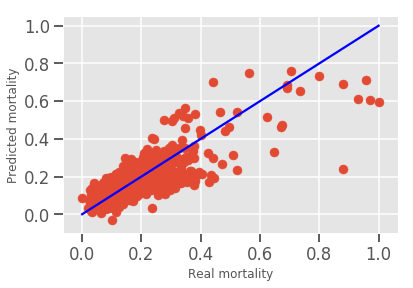

In [347]:
## How good is this?
plt.scatter(data.mortality,model.predict(data))
plt.plot([0,1],[0,1],color='blue')
plt.xlabel('Real mortality')
plt.ylabel('Predicted mortality')

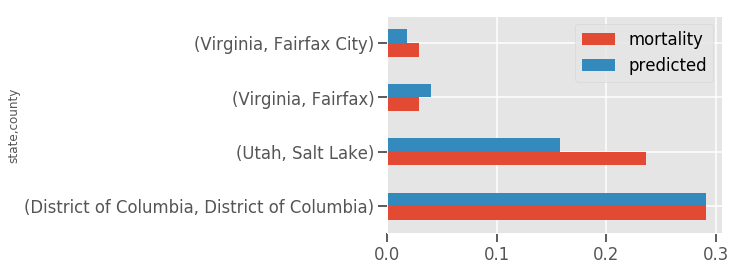

In [348]:
X = data[data.county.str.contains("Salt Lake|Fairfax|District")]
predicted = model.predict(X)
X[["mortality", "state", "county"]].assign(predicted=predicted).set_index(
    ["state", "county"]
).plot.barh()

In [349]:
## Same on saipe
model=smf.ols('mortality~(income_census)+nhwrate+blkrate+(pop_census)*mormon+state+nativerate+asianrate+state_mormon+pov_saipe_2010+hisprate',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mortality   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     106.2
Date:                Sun, 23 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:54:22   Log-Likelihood:                 5152.1
No. Observations:                3126   AIC:                        -1.018e+04
Df Residuals:                    3065   BIC:                            -9813.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.1492      0.111      1.346      0.178      -0.068       0.367
state[T.Alaska]                   0.1754      0.014     12.869      0.000       0.149       0.202
state[T.Arizona]                  0.0593      0.014      4.262      0.000       0.032       0.087
state[T.Arkansas]                 0.0027      0.008      0.337      0.736      -0.013       0.018
state[T.California]               0.0466      0.009      4.986      0.000       0.028       0.065
state[T.Colorado]                 0.0586      0.009      6.665      0.000       0.041       0.076
state[T.Connecticut]             -0.0307      0.018     -1.719      0.086      -0.066       0.004
state[T.Delaware]                 0.0184      0.028      0.662      0.508      -0.036       0.073
state[T.District of Columbia]     0.1334      0.048      2.800      0.005       0.040       0.227
state[T.Florida]                  0.0244      0.008      2.944      0.003       0.008       0.041
state[T.Georgia]                 -0.0021      0.007     -0.302      0.763      -0.016       0.011
state[T.Hawaii]                   0.0775      0.035      2.239      0.025       0.010       0.145
state[T.Idaho]                    0.0021      0.010      0.220      0.826      -0.017       0.021
state[T.Illinois]                -0.0398      0.008     -5.145      0.000      -0.055      -0.025
state[T.Indiana]                 -0.0135      0.008     -1.698      0.090      -0.029       0.002
state[T.Iowa]                    -0.0523      0.008     -6.648      0.000      -0.068      -0.037
state[T.Kansas]                  -0.0052      0.008     -0.663      0.507      -0.021       0.010
state[T.Kentucky]                 0.0157      0.008      2.080      0.038       0.001       0.030
state[T.Louisiana]               -0.0100      0.008     -1.213      0.225      -0.026       0.006
state[T.Maine]                   -0.0274      0.013     -2.059      0.040      -0.053      -0.001
state[T.Maryland]                 0.0075      0.011      0.658      0.511      -0.015       0.030
state[T.Massachusetts]           -0.0173      0.014     -1.218      0.223      -0.045       0.011
state[T.Michigan]                -0.0298      0.008     -3.708      0.000      -0.046      -0.014
state[T.Minnesota]               -0.0448      0.008     -5.531      0.000      -0.061      -0.029
state[T.Mississippi]             -0.0051      0.008     -0.648      0.517      -0.020       0.010
state[T.Missouri]                -0.0158      0.008     -2.089      0.037      -0.031      -0.001
state[T.Montana]                  0.0246      0.009      2.778      0.006       0.007       0.042
state[T.Nebraska]                -0.0453      0.008     -5.611      0.000      -0.061      -0.029
state[T.Nevada]                   0.1523     

In [350]:
## Same on saipe, no FE
model=smf.ols('mortality~(income_census)+nhwrate+blkrate+(pop_census)*mormon+nativerate+asianrate+state_mormon+pov_saipe_2010+hisprate',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mortality   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     292.8
Date:                Sun, 23 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:54:22   Log-Likelihood:                 4504.6
No. Observations:                3126   AIC:                            -8985.
Df Residuals:                    3114   BIC:                            -8913.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0846      0.106      0.795      0.426      -0.124       0.293
income_census         0.0398      0.009      4.608      0.000       0.023       0.057
nhwrate              -0.5174      0.062     -8.299      0.000      -0.640      -0.395
blkrate              -0.5312      0.062     -8.554      0.000      -0.653      -0.409
pop_census            0.0063      0.001      7.216      0.000       0.005       0.008
mormon                0.0003   8.14e-05      3.359      0.001       0.000       0.000
pop_census:mormon -2.514e-05   8.17e-06     -3.078      0.002   -4.12e-05   -9.13e-06
nativerate            0.0072      0.069      0.105      0.917      -0.127       0.142
asianrate            -0.9139      0.091    -10.043      0.000      -1.092      -0.735
state_mormon          0.1349      0.030      4.450      0.000       0.075       0.194
pov_saipe_2010        0.6429      0.032     20.058      0.000       0.580       0.706
hisprate             -0.5585      0.062     -8.974      0.000      -0.681      -0.437
==============================================================================
Omnibus:                     1386.698   Durbin-Watson:                   1.476
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26730.781
Skew:                           1.627   Prob(JB):                         0.00
Kurtosis:                      16.951   Cond. No.                     1.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

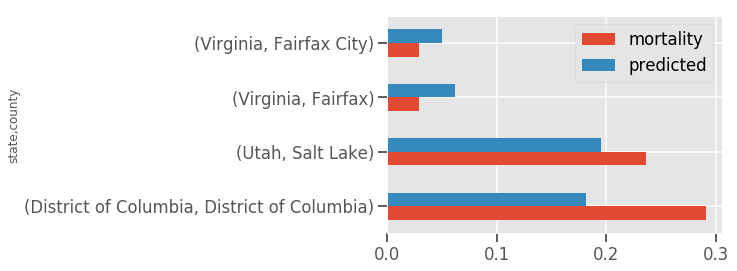

In [351]:
X = data[data.county.str.contains("Salt Lake|Fairfax|District")]
predicted = model.predict(X)
X[["mortality", "state", "county"]].assign(predicted=predicted).set_index(
    ["state", "county"]
).plot.barh()

In [352]:
#Does adding all the other religions help?
## Same on saipe
model=smf.ols('mortality~(income_census)+nhwrate+blkrate+(pop_census)*mormon'
              '+state+nativerate+asianrate+state_mormon+b_protes+catholic+e_protes+m_protes+'
              'south_baptist+o_jew+muslim+pov_saipe_2010+hisprate',data=data).fit()
model.summary()
#A bit, Loglikelihood,R2 went up, BIC is a bit petter

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mortality   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     96.16
Date:                Sun, 23 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:54:23   Log-Likelihood:                 5166.5
No. Observations:                3126   AIC:                        -1.020e+04
Df Residuals:                    3058   BIC:                            -9786.
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.1351      0.112      1.208      0.227      -0.084       0.355
state[T.Alaska]                   0.1871      0.014     13.395      0.000       0.160       0.214
state[T.Arizona]                  0.0673      0.014      4.767      0.000       0.040       0.095
state[T.Arkansas]                 0.0067      0.008      0.834      0.404      -0.009       0.023
state[T.California]               0.0545      0.010      5.601      0.000       0.035       0.074
state[T.Colorado]                 0.0673      0.009      7.270      0.000       0.049       0.085
state[T.Connecticut]             -0.0231      0.018     -1.271      0.204      -0.059       0.013
state[T.Delaware]                 0.0303      0.028      1.086      0.278      -0.024       0.085
state[T.District of Columbia]     0.1453      0.048      3.054      0.002       0.052       0.239
state[T.Florida]                  0.0305      0.009      3.582      0.000       0.014       0.047
state[T.Georgia]                  0.0027      0.007      0.388      0.698      -0.011       0.016
state[T.Hawaii]                   0.0912      0.035      2.624      0.009       0.023       0.159
state[T.Idaho]                    0.0092      0.010      0.928      0.354      -0.010       0.029
state[T.Illinois]                -0.0286      0.008     -3.448      0.001      -0.045      -0.012
state[T.Indiana]                 -0.0007      0.009     -0.079      0.937      -0.018       0.016
state[T.Iowa]                    -0.0344      0.009     -3.829      0.000      -0.052      -0.017
state[T.Kansas]                   0.0104      0.009      1.199      0.231      -0.007       0.027
state[T.Kentucky]                 0.0201      0.008      2.626      0.009       0.005       0.035
state[T.Louisiana]               -0.0063      0.009     -0.729      0.466      -0.023       0.011
state[T.Maine]                   -0.0189      0.014     -1.373      0.170      -0.046       0.008
state[T.Maryland]                 0.0195      0.012      1.647      0.100      -0.004       0.043
state[T.Massachusetts]           -0.0102      0.015     -0.694      0.488      -0.039       0.019
state[T.Michigan]                -0.0189      0.009     -2.153      0.031      -0.036      -0.002
state[T.Minnesota]               -0.0261      0.009     -2.819      0.005      -0.044      -0.008
state[T.Mississippi]             -0.0009      0.008     -0.118      0.906      -0.017       0.015
state[T.Missouri]                -0.0085      0.008     -1.087      0.277      -0.024       0.007
state[T.Montana]                  0.0355      0.010      3.724      0.000       0.017       0.054
state[T.Nebraska]                -0.0280      0.009     -3.090      0.002      -0.046      -0.010
state[T.Nevada]                   0.1579     

## Conclusion
For fixed effects model:
* Mormon coefficient for pov_saipe_2010=0.0002 (p=0.028)
* Mormon coefficient for state_mormon=0.0739 (p<0.001)



# Predicting with XGBoost
XGBoost is a library that enables one to train gradient boosted trees, which should better capture odd nonlinearities present in the data.

It has many parameters to tune, so I leave it in the bands of BayesSearchCV to find the optimal ones. It will try a combination of parameters, run a k-fold CV to estimate accuracy, and then make a guess about what the best combinations of parameters is, up to n times.

In [355]:
import xgboost as xgb

X_plain = data[
    [
        "state",
        "mormon",
        "pop_census",
        "income_census",
        "nhwrate",
        "blkrate",
        "hisprate",
        "nativerate",
        "asianrate",
        "state_mormon",
        "b_protes",
        "catholic",
        "e_protes",
        "m_protes",
        "south_baptist",
        "o_jew",
        "muslim",
        "pov_saipe_2010"
    ]
]
y = data.mortality
st_dummie = pd.get_dummies(data.state)
X = pd.concat([X_plain.drop(columns="state"), st_dummie], axis=1)

In [356]:
# https://www.kaggle.com/nikitpatel/random-grid-bayes-search-cv-for-xgb
from skopt import BayesSearchCV
from sklearn.model_selection import KFold

ITERATIONS = 40


def get_bayes_tuner(estimator, search_space):
    return BayesSearchCV(
        estimator=estimator,
        search_spaces=search_space,
        cv=KFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=6,
        n_iter=ITERATIONS,
        verbose=0,
        refit=True,
        random_state=42,
    )

In [357]:
result = get_bayes_tuner(xgb.XGBRegressor(n_jobs=2, silent=1),{
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (0, 10),
        'max_depth': (0, 12),       
        'subsample': (0.5, 1.0, 'uniform'),
        'colsample_bytree': (0.3, 1.0, 'uniform'),
        'colsample_bylevel': (0.5, 1.0, 'uniform'),
        'n_estimators': (50, 100,120)
    }).fit(
    X, y
)

In [358]:
#True score
result.best_score_

0.6872180882817546

In [359]:
#Fake score because we are training on the whole set
result.score(X,y)

0.9249880074375818

[<matplotlib.lines.Line2D at 0x7f2d9841a080>]

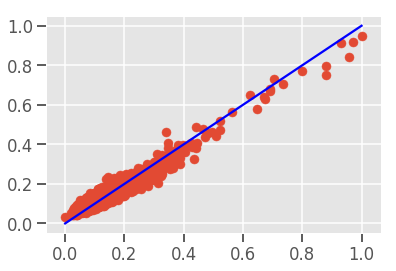

In [360]:
plt.scatter(y,result.predict(X))
plt.plot([0,1],[0,1],color='blue')

In [361]:
result.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
       colsample_bytree=0.8862346716150418, gamma=0,
       learning_rate=0.06034141051755345, max_delta_step=0, max_depth=10,
       min_child_weight=0, missing=None, n_estimators=100, n_jobs=2,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.5)

In [362]:
xgb_opt=xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
       colsample_bytree=0.8439139341231656, gamma=0,
       learning_rate=0.06471422112675844, max_delta_step=0, max_depth=12,
       min_child_weight=6, missing=None, n_estimators=100, n_jobs=2,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.5004278248599604)
xgb_opt.fit(X,y)
xgb_opt.score(X,y)

0.8948218174268642

<Figure size 864x1008 with 0 Axes>

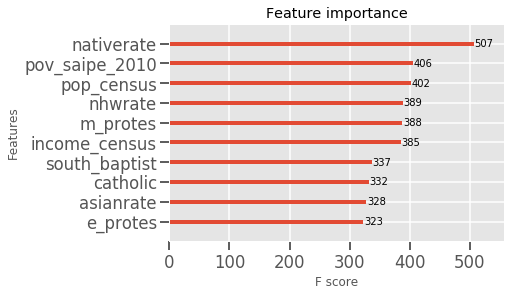

In [363]:
plt.figure(figsize=(12,14))
xgb.plot_importance(xgb_opt,max_num_features=10)

These feature importances are fake news because of multicollinearity issues (religiosity is collinear with the religion variables, for example), so we turn to SHAP to see what features drive this model.

[SHAP](https://arxiv.org/pdf/1705.07874.pdf) produces a score for each pair of (feature,sample), indicating how much that feature contributed in that particular case. In effect SHAP is solving a credit assignment problem.

Unlike with the coefficients in OLS, here we have scores per pair of features, which make it more important to visualise what is going on on a case by case basis to see if trends emerge

In [364]:
import shap
shap.initjs()

In [365]:
explainer=shap.TreeExplainer(xgb_opt)
shaps=explainer.shap_values(X)

In [366]:
#Model prediction: What happens if

'Position is 2778'

,Baseline,Predicted,NM County,NM State,NM State&County,No Religion
0,0.236136,0.232849,0.211437,0.159305,0.141915,0.119744


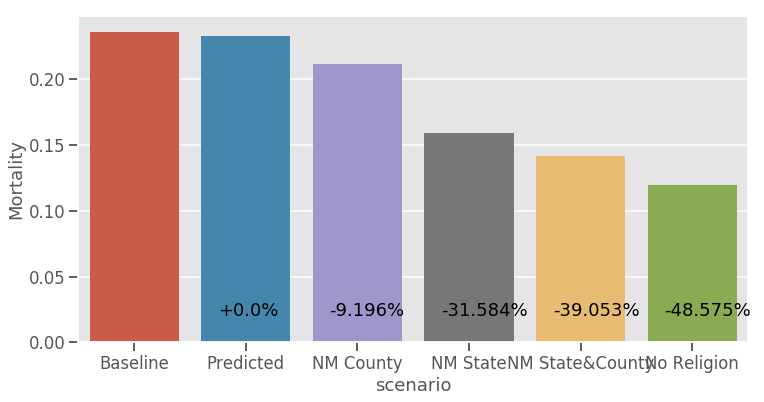

In [367]:
def plot_mormon_change(county, state,variable='mortality'):
    sns.set_context("talk")
    plt.figure(figsize=(12, 6))
    data_salt = data.query("county==@county and state==@state")
    salt = X.iloc[data_salt.index[0]].to_frame().T
    display(f'Position is {data_salt.index[0]}')
    baseline = data_salt[variable].values[0]
    predicted = xgb_opt.predict(salt)
    # No mormons
    nomormons = salt.assign(mormon=0)
    # No mormons in the state
    nostatemormon = salt.assign(state_mormon=0)
    # Both, plus no religiosity
    both = salt.assign(mormon=0, state_mormon=0)
    # No religion
    noreligion= salt.assign(
        mormon=0,
        state_mormon=0,
        muslim=0,
        catholic=0,
        e_protes=0,
        b_protes=0,
        m_protes=0,
        south_baptist=0,
        o_jew=0,
    )
    predicted_nomorm = xgb_opt.predict(nomormons)
    predicted_both = xgb_opt.predict(both)
    predicted_nostatemormon = xgb_opt.predict(nostatemormon)
    predicted_norel = xgb_opt.predict(noreligion)
    k = pd.DataFrame(
        {
            "Baseline": baseline,
            "Predicted": predicted,
            "NM County": predicted_nomorm,
            "NM State": predicted_nostatemormon,
            "NM State&County": predicted_both,
            "No Religion": predicted_norel,
        }
    )
    display(k)
    sns.barplot(x="scenario", y="value", data=k.melt(var_name="scenario"))
    plt.ylabel(variable.title())
    for pos, col in enumerate(k):
        if col == "Baseline":
            continue
        delta_predicted = np.round(
            100 * (k.at[0, col] - k.at[0, "Predicted"]) / k.at[0, "Predicted"], 3
        )
        string = f"{str(delta_predicted)}%"
        if "-" not in string:
            string = "+" + string
        plt.annotate(string, xy=(pos - 0.25, 0.02))


plot_mormon_change("Salt Lake", "Utah")

'Position is 217'

,Baseline,Predicted,NM County,NM State,NM State&County,No Religion
0,0.234244,0.178277,0.179639,0.164307,0.166082,0.101991


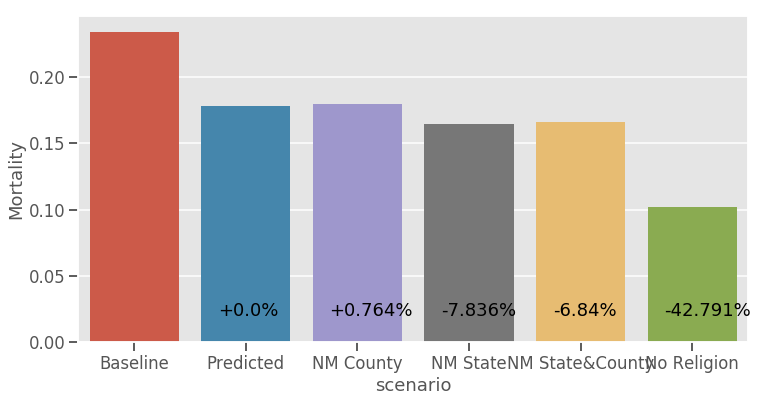

In [368]:
plot_mormon_change('San Francisco',"California")

In [369]:
#Salt Lake City
shap.force_plot(explainer.expected_value,shaps[2778,:],X.iloc[2778,:])

In [370]:
#San Francisco
shap.force_plot(explainer.expected_value,shaps[217,:],X.iloc[217,:])

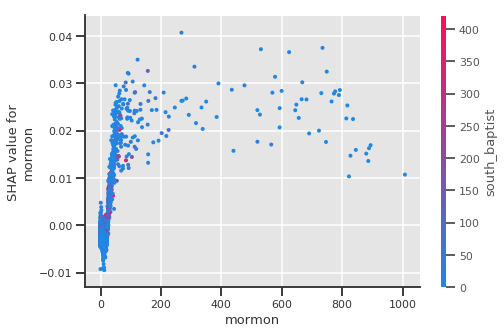

In [371]:
shap.dependence_plot("mormon", shaps,X)

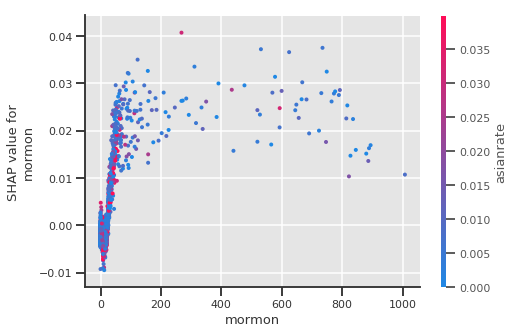

In [372]:
#All the mormons driving the correlation are in Mormon states
shap.dependence_plot("mormon", shaps,X,interaction_index=7)

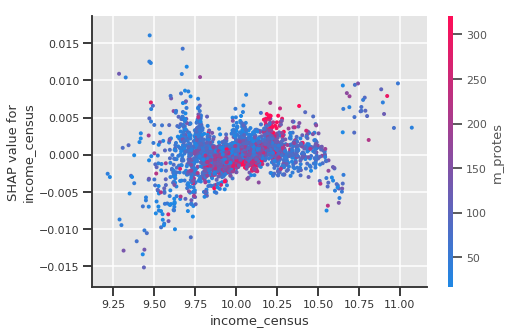

In [373]:
shap.dependence_plot("income_census", shaps, X)

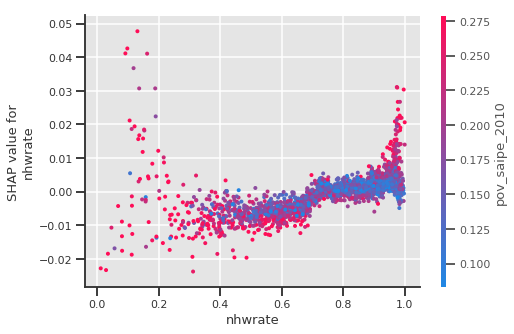

In [374]:
shap.dependence_plot("nhwrate", shaps, X)

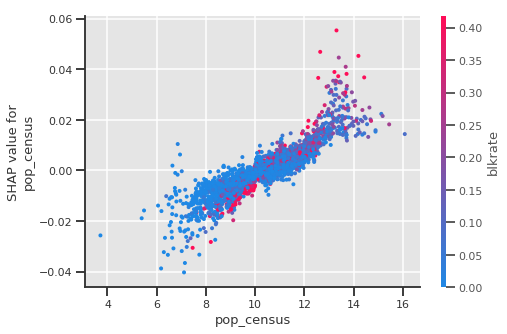

In [375]:
shap.dependence_plot("pop_census", shaps, X)

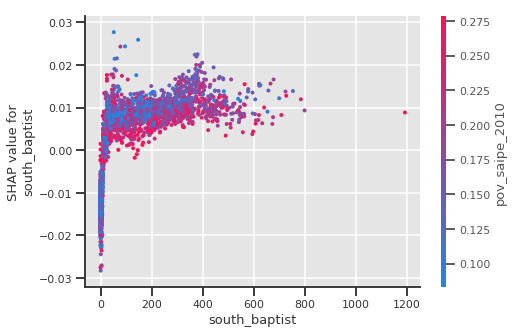

In [376]:
shap.dependence_plot("south_baptist", shaps, X)

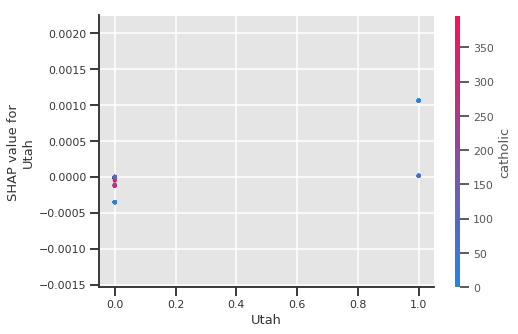

In [377]:
shap.dependence_plot("Utah", shaps, X)

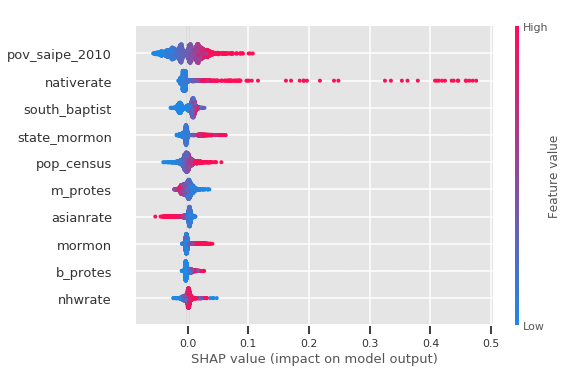

In [378]:
# This plot measures the impact of a variable on poverty. Each point is a particular county.
# The y-size of each row represents the density of points at that particular point
# High SHAP values mean in that case the variable in that case contributed to a higher poverty rate
# The sense in which it contributed can be glanced from the colorbar
# For example, the blue points in income_census mean that when income was low, the SHAP value was high (higher poverty)
# Positive values mean that in that part
shap.summary_plot(shaps,X,max_display=10)

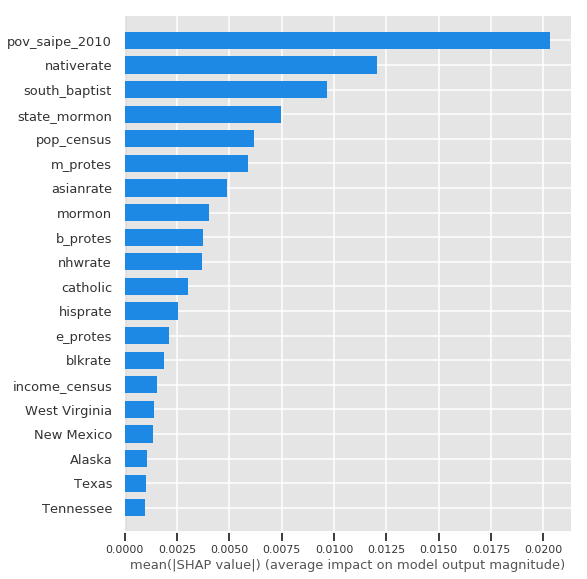

In [379]:
shap.summary_plot(shaps, X, plot_type="bar")

In [380]:
def plot_mortality(data,mort):
    t = data[["county", "state", "mormon", f"mortality_{mort}"]]
    t.plot.scatter("mormon", f"mortality_{mort}")
    plt.axhline(t[f"mortality_{mort}"].mean())
    plt.axhline(t[f"mortality_{mort}"].median())

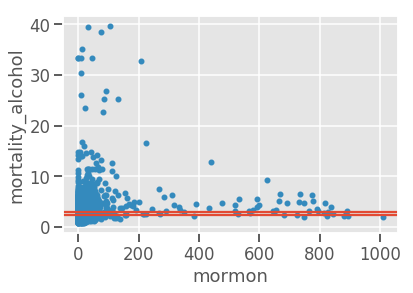

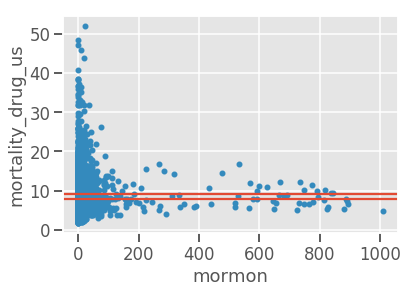

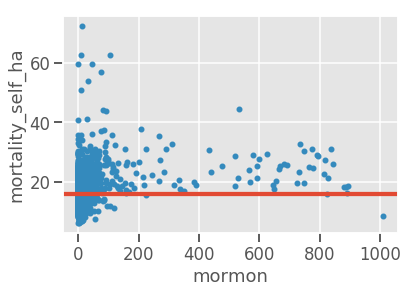

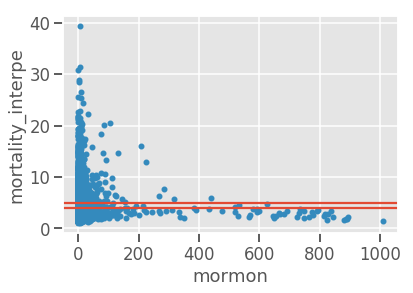

In [381]:
for i in ['alcohol','drug_us','self_ha','interpe']:
    plot_mortality(data,i)

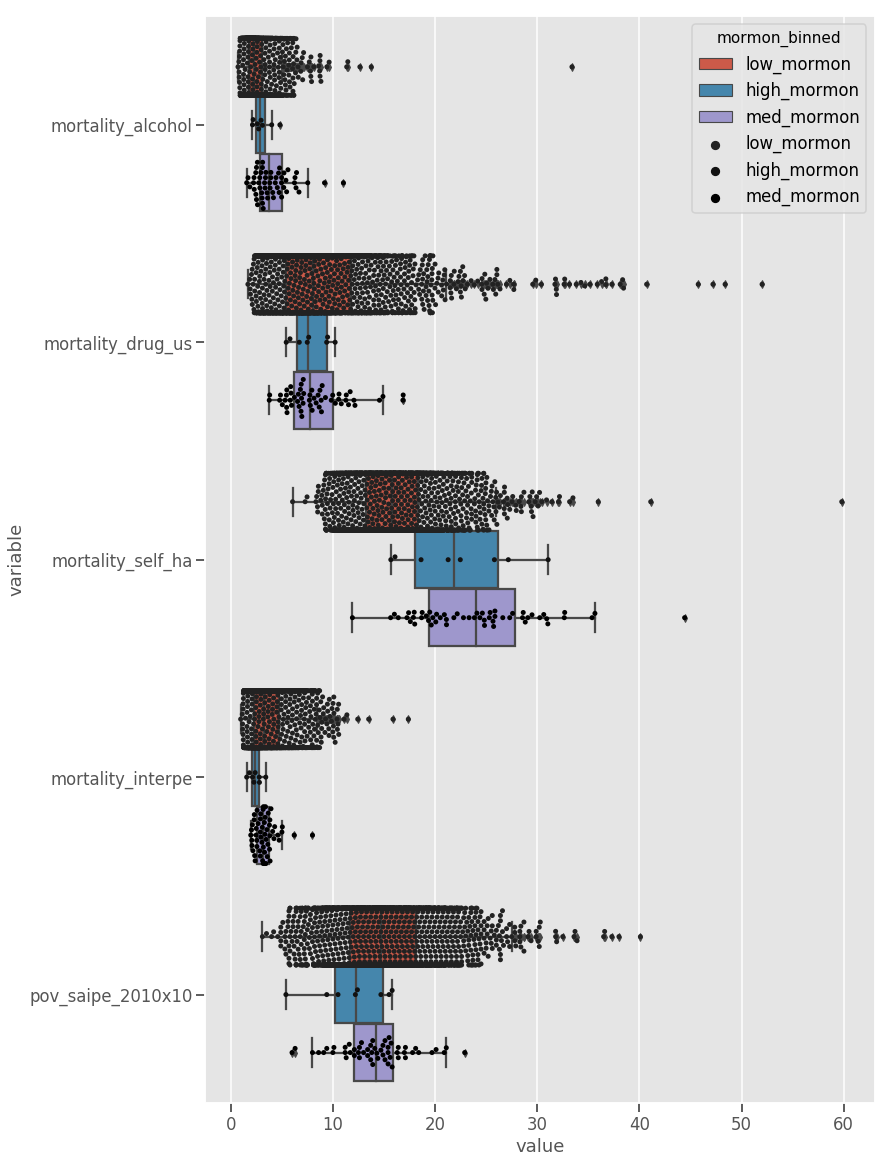

In [382]:
def cut(x):
    ret = np.where(
        x < 100, "low_mormon", np.where(x < 800, "med_mormon", "high_mormon")
    )
    return ret


# Best counties
t = (
    data.assign(
        mormon_binned=cut(data.mormon), pov_saipe_2010x10=data.pov_saipe_2010 * 100
    )
    .query("nhwrate>0.7")[
        [
            "mormon_binned",
            "mortality_alcohol",
            "mortality_drug_us",
            "mortality_self_ha",
            "mortality_interpe",
            "pov_saipe_2010x10",
        ]
    ]
    .sample(2000)
    .melt(id_vars="mormon_binned")
)
plt.figure(figsize=(12, 20))
sns.boxplot(y="variable", x="value", hue="mormon_binned", data=t)
sns.swarmplot(
    y="variable",
    x="value",
    hue="mormon_binned",
    data=t,
    dodge=True,
  
    color=".0",
    linewidth=0,
)

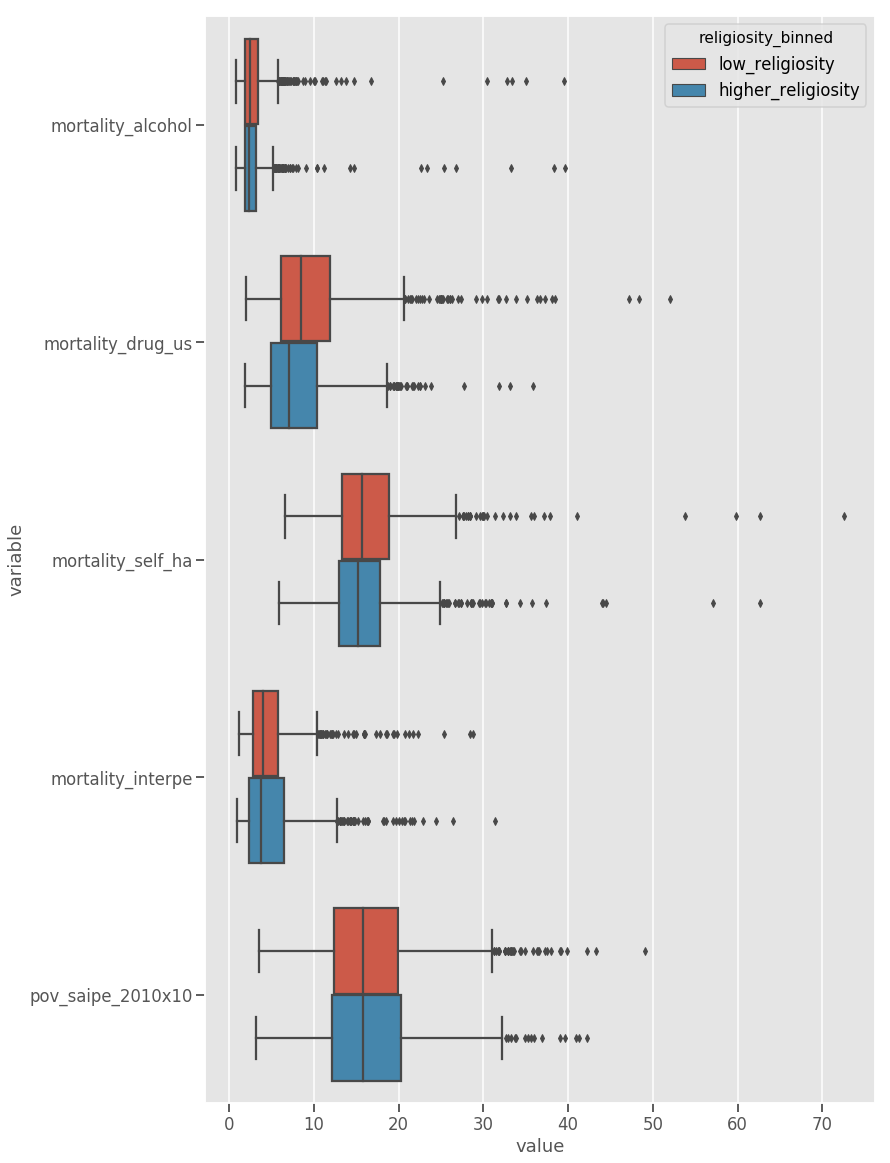

In [383]:
# Best counties (by religiosity)
t = (
    data.assign(
        religiosity_binned=np.where(
            data.religiosity < 0.5, "low_religiosity", "higher_religiosity"
        ),
        pov_saipe_2010x10=data.pov_saipe_2010 * 100,
    )
    [
        [
            "religiosity_binned",
            "mortality_alcohol",
            "mortality_drug_us",
            "mortality_self_ha",
            "mortality_interpe",
            "pov_saipe_2010x10",
        ]
    ]
    .sample(2000)
    .melt(id_vars="religiosity_binned")
)
plt.figure(figsize=(12, 20))
sns.boxplot(y="variable", x="value", hue="religiosity_binned", data=t)


In [384]:
data.sort_values('religiosity')
#http://www.thearda.com/rcms2010/r/c/21/rcms2010_21063_county_name_2010.asp
# It could be that in smaller places people adhere to minority religions that are not in the data
# If so lower pop->lower religiosity. 
data.corr().religiosity.sort_values()

mortality_drug_us   -0.219191
pop_census          -0.196785
mortality           -0.123218
outcomes            -0.110676
mortality_self_ha   -0.098788
asianrate           -0.087567
nhwrate             -0.057108
pop2010             -0.044850
income_census       -0.042815
pov_saipe_2010      -0.042128
mortality_alcohol   -0.039370
pov_saipe_2017      -0.034067
povrate             -0.015038
mortality_interpe   -0.007869
blkrate              0.006293
o_jew                0.014715
nativerate           0.015343
muslim               0.040388
b_protes             0.096097
state_mormon         0.099417
hisprate             0.103290
mormon               0.137374
south_baptist        0.342049
catholic             0.354759
m_protes             0.416115
e_protes             0.458991
religiosity          1.000000
Name: religiosity, dtype: float64

<Figure size 576x1728 with 0 Axes>

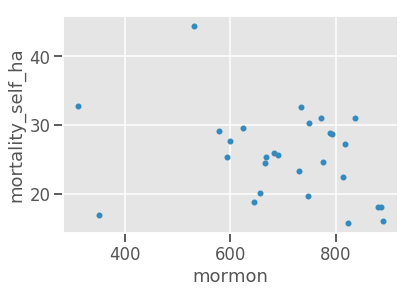

In [385]:
# Is suicide higher because of altitude? https://www.sciencedaily.com/releases/2018/03/180309170654.htm
# Relation between mormon, mortality_self_ha, and state
plt.figure(figsize=(8, 24))
t = (
    data.assign(
        #mormon_binned=np.where(data.mormon < 0.1, "low_mormon", "higher_mormon"),
        pov_saipe_2010x10=data.pov_saipe_2010 * 100,
    )
    .query("nhwrate>0.7 and state=='Utah'")[["mormon", "mortality_self_ha", "state"]]
    #.melt(id_vars=["mormon_binned", "state"])
)
t.plot.scatter('mormon','mortality_self_ha')

In [386]:
smf.ols('mortality_self_ha~mormon+state',data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      mortality_self_ha   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     38.85
Date:                Sun, 23 Dec 2018   Prob (F-statistic):          4.73e-289
Time:                        16:56:47   Log-Likelihood:                -8704.2
No. Observations:                3126   AIC:                         1.751e+04
Df Residuals:                    3074   BIC:                         1.783e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        16.7811      0.483     34.759      0.000      15.835      17.728
state[T.Alaska]                  15.2753      0.956     15.983      0.000      13.401      17.149
state[T.Arizona]                  5.1978      1.140      4.558      0.000       2.962       7.434
state[T.Arkansas]                 1.9101      0.664      2.876      0.004       0.608       3.212
state[T.California]              -1.0217      0.709     -1.440      0.150      -2.413       0.369
state[T.Colorado]                 3.5084      0.692      5.071      0.000       2.152       4.865
state[T.Connecticut]             -5.9063      1.478     -3.997      0.000      -8.804      -3.009
state[T.Delaware]                -2.5184      2.332     -1.080      0.280      -7.090       2.053
state[T.District of Columbia]    -7.5235      3.980     -1.890      0.059     -15.328       0.281
state[T.Florida]                  0.2402      0.683      0.352      0.725      -1.098       1.579
state[T.Georgia]                 -2.0455      0.575     -3.555      0.000      -3.174      -0.917
state[T.Hawaii]                   0.9230      2.035      0.454      0.650      -3.067       4.913
state[T.Idaho]                    2.9739      0.937      3.175      0.002       1.138       4.810
state[T.Illinois]                -3.6495      0.623     -5.862      0.000      -4.870      -2.429
state[T.Indiana]                 -1.1123      0.639     -1.741      0.082      -2.365       0.141
state[T.Iowa]                    -3.8916      0.625     -6.226      0.000      -5.117      -2.666
state[T.Kansas]                  -1.3786      0.618     -2.232      0.026      -2.590      -0.167
state[T.Kentucky]                 0.7040      0.603      1.168      0.243      -0.477       1.885
state[T.Louisiana]               -2.2274      0.691     -3.226      0.001      -3.581      -0.873
state[T.Maine]                   -1.5551      1.099     -1.415      0.157      -3.711       0.600
state[T.Maryland]                 0.6831      0.940      0.727      0.467      -1.160       2.526
state[T.Massachusetts]           -4.9994      1.161     -4.306      0.000      -7.276      -2.723
state[T.Michigan]                -1.1400      0.649     -1.757      0.079      -2.412       0.132
state[T.Minnesota]               -3.8284      0.642     -5.962      0.000      -5.088      -2.569
state[T.Mississippi]             -1.7561      0.651     -2.699      0.007      -3.032      -0.480
state[T.Missouri]                -0.0370      0.607     -0.061      0.951      -1.228       1.154
state[T.Montana]                  5.3236      0.718      7.415      0.000       3.916       6.731
state[T.Nebraska]                -3.3645      0.633     -5.314      0.000      -4.606      -2.123
state[T.Nevada]                  11.5505     

In [390]:
# Checks for multicollinearity
# https://etav.github.io/python/vif_factor_python.html
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

t = data[
    [
        "income_census",
        "nhwrate",
        "blkrate",
        "hisprate",
        "pop_census",
        "mormon",
        "nativerate",
        "asianrate",
        "state_mormon",
        "religiosity",
        "pov_saipe_2010",
        "mortality",
    ]
]
features = "+".join([i for i in t.columns if i not in ["mortality"]])
y, X_vif = dmatrices("mortality ~" + features, t, return_type="dataframe")
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif["features"] = X_vif.columns
vif.sort_values("VIF")
# Multicolinearity with the race variables

,VIF,features
10,1.114190,religiosity
5,1.492305,pop_census
1,3.498983,income_census
11,3.823248,pov_saipe_2010
9,4.495350,state_mormon
6,4.554222,mormon
8,5.246159,asianrate
7,22.429063,nativerate
4,60.982408,hisprate
3,78.584479,blkrate
